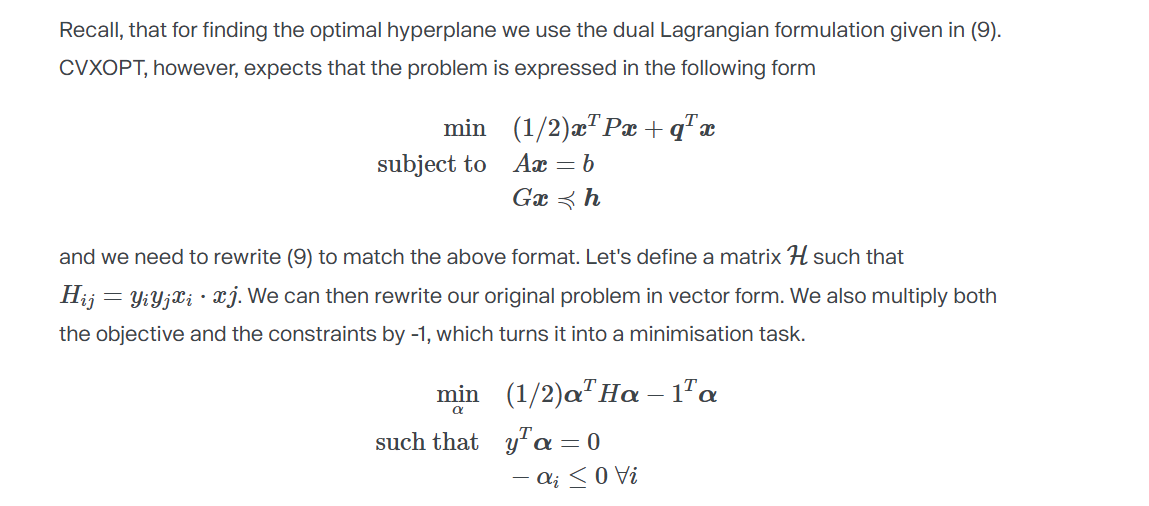

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from SVM import SVM
from main import get_data

X_train, X_test, y_train, y_test = get_data()

In [2]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy: {np.mean(y_pred == y_test)}")

Accuracy: 0.7238461538461538


In [4]:
svm = SVM(kernel="poly", C=1)
svm.fit(X_train[:2000], y_train[:2000])
y_pred = svm.predict(X_test)
print(f"Accuracy: {np.mean(y_pred == y_test)}")

Accuracy: 0.7484615384615385


In [40]:
from sklearn.datasets import make_blobs, make_moons

X_blob, y_blob = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
y_blob[y_blob == 0] = -1
X_moon, y_moon = make_moons(n_samples=100, noise=0.1, random_state=42)
y_moon[y_moon == 0] = -1

svm_moon = SVM(C=10, kernel='rbf')
svm_moon.fit(X_moon, y_moon)

svm_blob = SVM(C=1, kernel='linear')
svm_blob.fit(X_blob, y_blob)

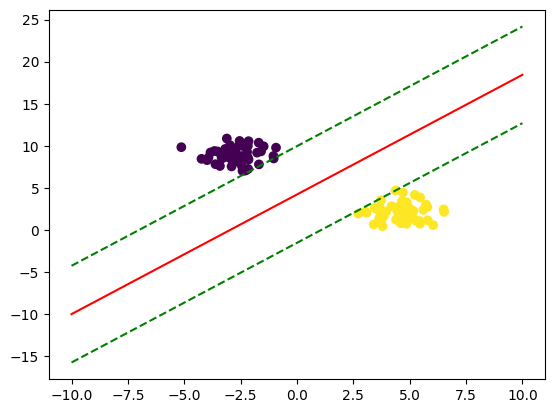

In [41]:
import matplotlib.pyplot as plt

w = svm_blob.w
b = svm_blob.b

X_net = np.linspace(-10, 10, 100)
Y_net = - w[0] / w[1] * X_net - b / w[1]
Y_net1 = - w[0] / w[1] * X_net - (b - 1) / w[1]
Y_net2 = - w[0] / w[1] * X_net - (b + 1) / w[1]

y_pred = svm_blob.predict(X_blob)

fig, ax = plt.subplots()
ax.scatter(X_blob[:, 0], X_blob[:, 1], c=y_pred)
ax.plot(X_net, Y_net, color='red')
ax.plot(X_net, Y_net1, color='green', linestyle='--')
ax.plot(X_net, Y_net2, color='green', linestyle='--')

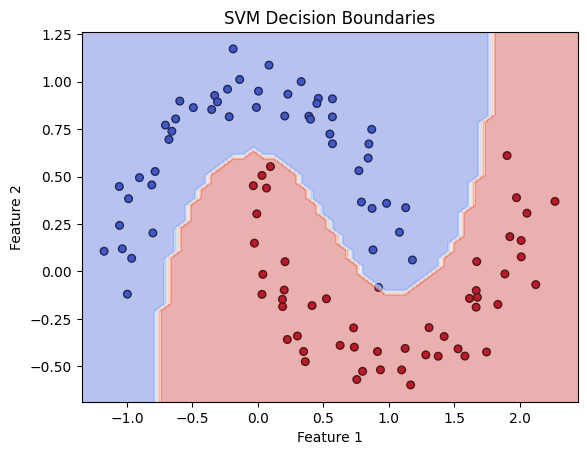

In [42]:
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_moon.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundaries')
plt.show()
